# 판다스 (데이터프레임) 데이터 조작 함수 사용

In [12]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [13]:
import pandas as pd
import numpy as np

### pandas 데이터처리 및 변환 관련 함수

count() : 데이터 개수 반환  
value_counts() : 데이터 빈도 수 반환  
sort_index() : 인덱스를 기준으로 정렬  
sort_values() : 데이터 값을 기준으로 정렬  
dropna() : NaN 제거  
fillna() : NaN을 다른 값으로 채움  
apply() : 동일한 반복 연산에 함수 적용  
cut() : 데이터 구간 분할  
qcut() : 경계선 없이 데이터 수가 동일한 구간으로 분할  
set_index() : 열로 인덱스 설정  
reset_index() : 인덱스 제거하고 열로 추가  
rename() : 열/행 인덱스 이름 변경  

### count() : 데이터 개수 반환
- NaN은 세지 않음

In [4]:
s = pd.Series(range(10))
s[3] = np.nan # NaN 값 지정 : np.NaN
s
# None : 판다스

0    0.0
1    1.0
2    2.0
3    NaN
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float64

In [5]:
# 시리즈 count()
s.count()
# NaN 값 제외

9

### 데이터 프레임에 count()함수 적용하기
- 각 열마다 데이터 개수를 세기때문에 누락된 부분을 찾을 때 유용

#### 난수 발생시켜 dataframe 생성
- np.random.randint(5) : 0~4 사이의 난수 발행
- 난수 seed(값)라는 함수를 사용할 수 있음
- seed의 의미 : 난수 알고리즘에서 사용하는 기본 값으로
    - 시드값이 같으면 동일한 난수가 발생함
    - 난수 함수 사용시 매번 고정된 값 발생
- 계속 변경되는 난수를 받고 싶으면 함수등을 이용해서 시드값이 매번 변하게 작업해야 함. time.time()

In [3]:
# 실행할 때마다 다른 값 발생
np.random.randint(3) # 0~2 중 1개 값 생성

0

In [4]:
# 실행할 때마다 다른 값 발생
np.random.randint(5, size=4) # 0~4 중 4개 값 생성

array([1, 0, 0, 4])

In [5]:
# 실행할 때마다 고정값으로 난수 발생 : seed 값 지정
np.random.seed(3)
np.random.randint(5, size=4)

array([2, 0, 1, 3])

In [6]:
# 실행할 때마다 고정값으로 난수 발생 : seed 값 지정
np.random.seed(3)
df1 = pd.DataFrame(np.random.randint(5, size=(4, 4)))
df1

,0,1,2,3
0,2,0,1,3
1,0,0,0,3
2,2,3,1,1
3,2,0,4,4


In [7]:
# 3행 4열에 NaN 값 지정
df1.iloc[2, 3] = np.nan
df1

df1.iloc[2, 3] = None
df1

,0,1,2,3
0,2,0,1,3.0
1,0,0,0,3.0
2,2,3,1,NaN
3,2,0,4,4.0


,0,1,2,3
0,2,0,1,3.0
1,0,0,0,3.0
2,2,3,1,NaN
3,2,0,4,4.0


In [8]:
df1.dtypes

0      int32
1      int32
2      int32
3    float64
dtype: object

In [9]:
# 각 열의 원소의 개수 카운트
df1.count()
# 3열의 NaN 값 제외 : 3개 

0    4
1    4
2    4
3    3
dtype: int64

In [10]:
############################################################################

- 타이타닉 승객 데이터 사용
    - seaborn 패키지 내에 dataset으로 존재
    - 데이터셋 읽어오기 : 패키지명.load_dataset("data명")

In [11]:
import seaborn as sns

In [58]:
# 타이타닉 승객 데이터 로드
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [59]:
titanic.head(2)
titanic.tail(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [60]:
# titanic.csv 파일로 저장
titanic.to_csv('../data/titanic.csv')

In [62]:
# 데이터 정보 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


변수설명  
passengerId : 각 승객의 고유 번호  
survived : 생존 여부(종속 변수)  
	0 = 사망  
	1 = 생존  
class : 객실 등급 - 승객의 사회적, 경제적 지위  
	First    
	Second     
	Third  
sex : 성별  
age : 나이  
sibsp : 동반한 Sibling(형제자매)와 Spouse(배우자)의 수  
parch : 동반한 Parent(부모) Child(자식)의 수   
fare : 티켓의 요금  
embark_town : 승선한 항  
	C = Cherbourg (셰르부르)  
	Q = Queenstown  
	S = Southampton  

In [64]:
# age : float 타입 
# NaN 값 때문인지, 실수값이 존재하는지 확인 
# age 열의 값 중에서 1보다 작은 값을 갖는 행을 데이터프레임으로 추출
titanic[titanic['age']<1]

# age 열만 추출
titanic.loc[titanic.age < 1, ['age']]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False
469,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
644,1,3,female,0.75,2,1,19.2583,C,Third,child,False,NaN,Cherbourg,yes,False
755,1,2,male,0.67,1,1,14.5000,S,Second,child,False,NaN,Southampton,yes,False
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,NaN,Cherbourg,yes,False
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False


,age
78,0.83
305,0.92
469,0.75
644,0.75
755,0.67
803,0.42
831,0.83


In [65]:
# 각 열의 값의 개수 
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

### value_counts()  함수

###  카테고리 값 세기
- 시리즈의 값이 정수,문자열 등 카테고리 값인 경우에
- 시리즈.value_counts() 메서드를 사용해 각각의 값이 나온 횟수를 셀 수 있음
    - value_counts() 인수 
        - dropna=True 디폴트 (NaN 무시)  
        - dropna=False : NaN 개수도 카운트  
        - ascending=True : 오름차순 정렬 (기본 False로 내림차순)  
        - normalize=True  
            - 각 값 및 전체에서의 범주형 데이터의 비율을 계산  
            - 전체 10개 중 1이 3개 : 0.3  
            - 시리즈.value_counts(normalize=True)  

##### 범주형 데이터에 value_counts() 함수 적용
- 범주형 데이터 : 관측 결과가 몇개의 범주 또는 항목의 형태로 나타나는 자료
    - ex. 성별(남,여), 선호도(좋다, 보통, 싫다), 혈액형(A,B,O,AB) 등

In [68]:
# titanic 데이터의 alive 열의 생존여부 확인 (yes/no)
titanic['alive'].value_counts()

# 전체 값에서 각 값의 비율로 표시 
titanic['alive'].value_counts(normalize=True)

# 비율 퍼센트
titanic['alive'].value_counts(normalize=True) * 100

alive
no     549
yes    342
Name: count, dtype: int64

alive
no     0.616162
yes    0.383838
Name: proportion, dtype: float64

alive
no     61.616162
yes    38.383838
Name: proportion, dtype: float64

In [69]:
# 타이타닉 호에 승선한 승객의  남여 수와 비율 확인
titanic['sex'].value_counts()
titanic['sex'].value_counts(normalize=True)

sex
male      577
female    314
Name: count, dtype: int64

sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

In [70]:
# 성별에 따른 생존자 수와 사망자 수의 정보 출력
titanic[['sex','alive']].value_counts()

sex     alive
male    no       468
female  yes      233
male    yes      109
female  no        81
Name: count, dtype: int64

In [76]:
# 성별에 따른 생존자 수와 사망자 수의 정보를 가지고 있는 데이터프레임 생성
df = pd.DataFrame(titanic[['sex','alive']].value_counts())
df
df.index

,,count
sex,alive,
male,no,468
female,yes,233
male,yes,109
female,no,81


MultiIndex([(  'male',  'no'),
            ('female', 'yes'),
            (  'male', 'yes'),
            ('female',  'no')],
           names=['sex', 'alive'])

In [77]:
df2 = pd.DataFrame(titanic[['sex']].value_counts())
df2
df2.index

,count
sex,
male,577
female,314


MultiIndex([(  'male',),
            ('female',)],
           names=['sex'])

In [79]:
# value_counts() : NaN 값을 포함시키지 않음
# NaN 제외 : dropna=True 디폴트 (생략 가능)
titanic['embarked'].value_counts()
titanic['embarked'].value_counts(normalize=True)

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

In [80]:
# dropna=False : NaN 값 포함
titanic['embarked'].value_counts(dropna=False)
titanic['embarked'].value_counts(dropna=False, normalize=True)

embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

embarked
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: proportion, dtype: float64

In [81]:
# 기본 정렬 : 내림차순 정렬
# 오름차순 정렬로 설정 : ascending=True
titanic['embarked'].value_counts(dropna=False, ascending=True) # 오름차순 정렬

embarked
NaN      2
Q       77
C      168
S      644
Name: count, dtype: int64

### 정렬함수 -데이터 정렬 시 사용
- sort_index(ascending=True/False) : 인덱스를 기준으로 정렬
    - ascending 생략하면 오름차순 정렬
- sort_values(ascending=True/False) : 데이터 값을 기준으로 정렬

In [82]:
# 시리즈 생성
np.random.seed(1)
s2 = pd.Series(np.random.randint(6, size=100)) # 0~5 사이의 정수 100개 생성
s2

0     5
1     3
2     4
3     0
4     1
     ..
95    4
96    5
97    2
98    4
99    3
Length: 100, dtype: int32

In [83]:
# 빈도값을 기준으로 내림차순 정렬
s2.value_counts() # 기본 내림차순

1    22
0    18
4    17
5    16
3    14
2    13
Name: count, dtype: int64

In [84]:
# 빈도값을 기준으로 오름차순 정렬 : sort_values()
s2.value_counts().sort_values() # 기본 오름차순

2    13
3    14
5    16
4    17
0    18
1    22
Name: count, dtype: int64

In [85]:
# 빈도값을 기준으로 내림차순 정렬 : ascending=False
s2.value_counts().sort_values(ascending=False)

1    22
0    18
4    17
5    16
3    14
2    13
Name: count, dtype: int64

In [87]:
# 인덱스 기준으로 오름차순 정렬 (ascending : 오름차순)
s2.value_counts().sort_index()
s2.value_counts().sort_index(ascending=True)

# 인덱스 기준으로 내림차순 정렬
s2.value_counts().sort_index(ascending=False)

0    18
1    22
2    13
3    14
4    17
5    16
Name: count, dtype: int64

0    18
1    22
2    13
3    14
4    17
5    16
Name: count, dtype: int64

5    16
4    17
3    14
2    13
1    22
0    18
Name: count, dtype: int64

### 데이터프레임 정렬
- df.sort_values() : 특정 열 값 기준 정렬  
  - 데이터프레임은 2차원 배열과 동일하기 때문에  
    - 정렬 시 기준 열 필요 : by 인수(옵션) 사용 (생략 불가)
    - by = 기준열, by = [기준열1, 기준열2] 
- df.sort_index() : df의 index 기준 정렬  
  - 오름차순/내림차순 : ascending=True/False (생략하면 오름차순)  

In [88]:
df1

,0,1,2,3
0,2,0,1,3.0
1,0,0,0,3.0
2,2,3,1,NaN
3,2,0,4,4.0


In [90]:
# df1.sort_values() # 정렬기준 by 없으면 오류 

In [91]:
# 0 열 기준 오름차순 정렬
df1.sort_values(by=0)

# 0 열 기준 내림차순 정렬
df1.sort_values(by=0, ascending=False)

,0,1,2,3
1,0,0,0,3.0
0,2,0,1,3.0
2,2,3,1,NaN
3,2,0,4,4.0


,0,1,2,3
0,2,0,1,3.0
2,2,3,1,NaN
3,2,0,4,4.0
1,0,0,0,3.0


In [92]:
# 2차 정렬 : by[기준1, 기준2]
# 0열 기준으로 1차 정렬
# 정렬 결과 동일한 값에 대해 2열 기준 2차 정렬 
df1.sort_values(by=[0, 2], ascending=False) #(내림차순 정렬)

,0,1,2,3
3,2,0,4,4.0
0,2,0,1,3.0
2,2,3,1,NaN
1,0,0,0,3.0


In [93]:
# 3차 정렬 : 1열 기준
df1.sort_values(by=[0, 2, 1], ascending=False) #(내림차순 정렬)

,0,1,2,3
3,2,0,4,4.0
2,2,3,1,NaN
0,2,0,1,3.0
1,0,0,0,3.0


### 행/열 합계 및 평균
- df.sum() 사용
  - 행과 열의합계 : sum(axis=0/1) : axis는 0이 기본
  - axis = 0 : 각 열의 합계
  - axis = 1 : 각 행의 합계 

In [97]:
# 4행 8열의 데이터프레임 생성 
# 0~9 범위 값으로 난수 발생 
# seed 값 1로 고정

np.random.seed(1)
df2 = pd.DataFrame(np.random.randint(10, size=(4,8)))
df2

,0,1,2,3,4,5,6,7
0,5,8,9,5,0,0,1,7
1,6,9,2,4,5,2,4,2
2,4,7,7,9,1,7,0,6
3,9,9,7,6,9,1,0,1


In [98]:
# 각  행의 합계
df2.sum(axis=1)

0    35
1    34
2    41
3    42
dtype: int64

In [99]:
# 각 열의 합계
df2.sum(axis=0)

0    24
1    33
2    25
3    24
4    15
5    10
6     5
7    16
dtype: int64

In [100]:
df2.sum() # axis 값 생략하면 기본인 axis=0 : 각 열의 합계 

0    24
1    33
2    25
3    24
4    15
5    10
6     5
7    16
dtype: int64

In [101]:
# 각 열의 평균
df2.mean(axis=0)

# 각 행의 평균
df2.mean(axis=1)

0    6.00
1    8.25
2    6.25
3    6.00
4    3.75
5    2.50
6    1.25
7    4.00
dtype: float64

0    4.375
1    4.250
2    5.125
3    5.250
dtype: float64

In [ ]:
# max() / min() 동일

In [102]:
df2

,0,1,2,3,4,5,6,7
0,5,8,9,5,0,0,1,7
1,6,9,2,4,5,2,4,2
2,4,7,7,9,1,7,0,6
3,9,9,7,6,9,1,0,1


In [103]:
# df2에 각 행의  합계를 표시하는 'total' 열 추가
df2['total'] = df2.sum(axis=1)
df2

,0,1,2,3,4,5,6,7,total
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42


In [104]:
# 각 열의 합계를 표시하는 col_total 행 추가
df2.loc['col_total'] = df2.sum()
df2

,0,1,2,3,4,5,6,7,total
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42
col_total,24,33,25,24,15,10,5,16,152


In [105]:
# 각 열의 최대값을 구해서 max 행으로 추가 
df2.loc['max'] = df2[0:4].max()
df2

,0,1,2,3,4,5,6,7,total
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42
col_total,24,33,25,24,15,10,5,16,152
max,9,9,9,9,9,7,4,7,42


In [106]:
df2.loc['max2'] = df2.iloc[0:4].max()
df2

,0,1,2,3,4,5,6,7,total
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42
col_total,24,33,25,24,15,10,5,16,152
max,9,9,9,9,9,7,4,7,42
max2,9,9,9,9,9,7,4,7,42


In [107]:
df2.loc['max3'] = df2.loc[0:3].max()
df2

,0,1,2,3,4,5,6,7,total
0,5,8,9,5,0,0,1,7,35
1,6,9,2,4,5,2,4,2,34
2,4,7,7,9,1,7,0,6,41
3,9,9,7,6,9,1,0,1,42
col_total,24,33,25,24,15,10,5,16,152
max,9,9,9,9,9,7,4,7,42
max2,9,9,9,9,9,7,4,7,42
max3,9,9,9,9,9,7,4,7,42


In [113]:
# 각 행의 평균 값을 구해서 average 열 추가 : mean() 사용
df2['average'] = df2.iloc[:, 0:8].mean(axis=1)
df2

,0,1,2,3,4,5,6,7,total,average
0,5,8,9,5,0,0,1,7,35,4.375
1,6,9,2,4,5,2,4,2,34,4.250
2,4,7,7,9,1,7,0,6,41,5.125
3,9,9,7,6,9,1,0,1,42,5.250
col_total,24,33,25,24,15,10,5,16,152,19.000
max,9,9,9,9,9,7,4,7,42,7.875
max2,9,9,9,9,9,7,4,7,42,7.875
max3,9,9,9,9,9,7,4,7,42,7.875


In [112]:
# df2.iloc[0:4, 0:8] # 0~3 행
df2.iloc[:, 0:8] # 모든 행 (:) : start~end-1까지
df2.loc[:, 0:7] # start~end까지

,0,1,2,3,4,5,6,7
0,5,8,9,5,0,0,1,7
1,6,9,2,4,5,2,4,2
2,4,7,7,9,1,7,0,6
3,9,9,7,6,9,1,0,1
col_total,24,33,25,24,15,10,5,16
max,9,9,9,9,9,7,4,7
max2,9,9,9,9,9,7,4,7
max3,9,9,9,9,9,7,4,7


,0,1,2,3,4,5,6,7
0,5,8,9,5,0,0,1,7
1,6,9,2,4,5,2,4,2
2,4,7,7,9,1,7,0,6
3,9,9,7,6,9,1,0,1
col_total,24,33,25,24,15,10,5,16
max,9,9,9,9,9,7,4,7
max2,9,9,9,9,9,7,4,7
max3,9,9,9,9,9,7,4,7


### NaN 값 처리 함수
- df.dropna(axis = 0 /1)  
   - NaN 값이 포함된 열 또는 행 삭제  
   - 변경 사항을 원본 데이터에 반영하려면 inplace=True 설정  
- df.fillna(값)  
  - NaN을 정해진 값으로 채움  
  - 변경 사항을 원본 데이터에 반영하려면 inplace=True 설정   

In [114]:
df2

,0,1,2,3,4,5,6,7,total,average
0,5,8,9,5,0,0,1,7,35,4.375
1,6,9,2,4,5,2,4,2,34,4.250
2,4,7,7,9,1,7,0,6,41,5.125
3,9,9,7,6,9,1,0,1,42,5.250
col_total,24,33,25,24,15,10,5,16,152,19.000
max,9,9,9,9,9,7,4,7,42,7.875
max2,9,9,9,9,9,7,4,7,42,7.875
max3,9,9,9,9,9,7,4,7,42,7.875


In [115]:
# 0행 0열에 NaN 값 추가
df2.iloc[0, 0] = np.nan
df2
# NaN 값이 포함되면 데이터 타입이 실수로 변환
# 0열의 값이 실수로 변환됨

# df2[0][0] = np.nan

,0,1,2,3,4,5,6,7,total,average
0,NaN,8,9,5,0,0,1,7,35,4.375
1,6.0,9,2,4,5,2,4,2,34,4.250
2,4.0,7,7,9,1,7,0,6,41,5.125
3,9.0,9,7,6,9,1,0,1,42,5.250
col_total,24.0,33,25,24,15,10,5,16,152,19.000
max,9.0,9,9,9,9,7,4,7,42,7.875
max2,9.0,9,9,9,9,7,4,7,42,7.875
max3,9.0,9,9,9,9,7,4,7,42,7.875


In [116]:
# NaN이 포함된 행 삭제 : axis=0
# 변경 사항을 원본 데이터에 반영
df2.dropna(axis=0, inplace=True)
df2

,0,1,2,3,4,5,6,7,total,average
1,6.0,9,2,4,5,2,4,2,34,4.250
2,4.0,7,7,9,1,7,0,6,41,5.125
3,9.0,9,7,6,9,1,0,1,42,5.250
col_total,24.0,33,25,24,15,10,5,16,152,19.000
max,9.0,9,9,9,9,7,4,7,42,7.875
max2,9.0,9,9,9,9,7,4,7,42,7.875
max3,9.0,9,9,9,9,7,4,7,42,7.875


In [117]:
# 0행 0열에 NaN 값 지정
df2.iloc[0, 0] = np.nan
df2

,0,1,2,3,4,5,6,7,total,average
1,NaN,9,2,4,5,2,4,2,34,4.250
2,4.0,7,7,9,1,7,0,6,41,5.125
3,9.0,9,7,6,9,1,0,1,42,5.250
col_total,24.0,33,25,24,15,10,5,16,152,19.000
max,9.0,9,9,9,9,7,4,7,42,7.875
max2,9.0,9,9,9,9,7,4,7,42,7.875
max3,9.0,9,9,9,9,7,4,7,42,7.875


In [118]:
# NaN 값이 포함된 열 삭제 : axis=1
df2.dropna(axis=1, inplace=True)
df2

,1,2,3,4,5,6,7,total,average
1,9,2,4,5,2,4,2,34,4.250
2,7,7,9,1,7,0,6,41,5.125
3,9,7,6,9,1,0,1,42,5.250
col_total,33,25,24,15,10,5,16,152,19.000
max,9,9,9,9,7,4,7,42,7.875
max2,9,9,9,9,7,4,7,42,7.875
max3,9,9,9,9,7,4,7,42,7.875


In [120]:
# NaN 추가
# 0행 0열
# 1행 4열
# 2행 5열
df2.iloc[0,0] = np.nan
df2.iloc[1,4] = np.nan
df2.iloc[2,5] = np.nan
df2

,1,2,3,4,5,6,7,total,average
1,NaN,2,4,5,2.0,4.0,2,34,4.250
2,7.0,7,9,1,NaN,0.0,6,41,5.125
3,9.0,7,6,9,1.0,NaN,1,42,5.250
col_total,33.0,25,24,15,10.0,5.0,16,152,19.000
max,9.0,9,9,9,7.0,4.0,7,42,7.875
max2,9.0,9,9,9,7.0,4.0,7,42,7.875
max3,9.0,9,9,9,7.0,4.0,7,42,7.875


In [121]:
# NaN 값을 0으로 채우기 
df2.fillna(0, inplace=True)
df2

,1,2,3,4,5,6,7,total,average
1,0.0,2,4,5,2.0,4.0,2,34,4.250
2,7.0,7,9,1,0.0,0.0,6,41,5.125
3,9.0,7,6,9,1.0,0.0,1,42,5.250
col_total,33.0,25,24,15,10.0,5.0,16,152,19.000
max,9.0,9,9,9,7.0,4.0,7,42,7.875
max2,9.0,9,9,9,7.0,4.0,7,42,7.875
max3,9.0,9,9,9,7.0,4.0,7,42,7.875


In [124]:
# 1개의 열 값만 정수로 변환 : astype(int)
# 1열의 모든 값을 정수로 변환
df2[1] = df2[1].astype(int)
df2

,1,2,3,4,5,6,7,total,average
1,0,2,4,5,2.0,4.0,2,34,4.250
2,7,7,9,1,0.0,0.0,6,41,5.125
3,9,7,6,9,1.0,0.0,1,42,5.250
col_total,33,25,24,15,10.0,5.0,16,152,19.000
max,9,9,9,9,7.0,4.0,7,42,7.875
max2,9,9,9,9,7.0,4.0,7,42,7.875
max3,9,9,9,9,7.0,4.0,7,42,7.875


In [125]:
# 여러 개의 열 값을 정수로 변환
df2[[5, 6]] = df2[[5, 6]].astype(int)
df2

,1,2,3,4,5,6,7,total,average
1,0,2,4,5,2,4,2,34,4.250
2,7,7,9,1,0,0,6,41,5.125
3,9,7,6,9,1,0,1,42,5.250
col_total,33,25,24,15,10,5,16,152,19.000
max,9,9,9,9,7,4,7,42,7.875
max2,9,9,9,9,7,4,7,42,7.875
max3,9,9,9,9,7,4,7,42,7.875


In [126]:
# 데이터프레임 전체의 값을 정수로 변환
df2 = df2.astype(int)
df2

# 주의! : 모든 값이 숫자인 경우에만 가능
# NaN이 포함되어 있는 상태에서 형변환하면 오류 발생
# -> 먼저 NaN 값을 숫자로 변경 후 형 변환

,1,2,3,4,5,6,7,total,average
1,0,2,4,5,2,4,2,34,4
2,7,7,9,1,0,0,6,41,5
3,9,7,6,9,1,0,1,42,5
col_total,33,25,24,15,10,5,16,152,19
max,9,9,9,9,7,4,7,42,7
max2,9,9,9,9,7,4,7,42,7
max3,9,9,9,9,7,4,7,42,7


### 열 또는 행에 동일한 연산 반복 적용할 때 : apply() 메소드 (함수)
- apply() 함수 : DataFrame의 행이나 열에 복잡한 반복 연산을 수행 메소드
    - 동일한 연산은 함수화 되어있어야 함   
    - 주로 익명의 lambda 함수를 같이 사용  
    - dataframe의 특정 영역을 함수의 입력 값으로 받고   
    - axis 옵션을 주어 행과 열 데이터 중 원하는 데이터를 처리  

- apply(반복적용할 함수, axis=0/1)  
    - 0 : 열마다 반복  
    - 1 : 행마다 반복    
    - 생략시 기본값 : 0 
    
- 적용되는 함수가 행/열 자체가 아닌 각 요소에 적용되는 함수인 경우  
  - axis값이 0 또는 1에 대해 동일한 결과 출력  


- apply() 함수는 데이터프레임에 사용
- 시리즈에서는 map() 함수 사용

In [127]:
df3 = pd.DataFrame({
    'a':[1,3,4,3,4],
    'b':[2,3,1,4,5],
    'c':[1,5,2,4,4]
})
df3

,a,b,c
0,1,2,1
1,3,3,5
2,4,1,2
3,3,4,4
4,4,5,4


In [ ]:
# np.sum() 함수에 데이터 전달 

In [129]:
# apply() 사용하지 않고
# 각 열에 대해 np.sum() 함수를 사용 : 반복 적용
np.sum(df3['a'])
np.sum(df3['b'])
np.sum(df3['c'])

15

15

16

In [130]:
# apply() 함수를 사용해서 반복 적용
# apply(반복 적용할 함수명, axis=0/1) : 함수명 다음에 괄호() 없음
# 0: 열에 대해 반복 적용 (디폴트 : 생략 가능)
# 1: 행에 대해 반복 적용
df3.apply(np.sum, axis=0) # 각 열에 반복 적용

a    15
b    15
c    16
dtype: int64

In [131]:
df3.apply(np.sum) # axis=0 생략 가능

a    15
b    15
c    16
dtype: int64

In [132]:
df3.apply(np.sum, axis=1) # 각 행에 반복 적용

0     4
1    11
2     7
3    11
4    13
dtype: int64

### 사용자 정의 함수를 apply() 함수에 사용

In [135]:
# 사용자 정의 함수  
# 시리즈 값을 전달 받아서 제곱의 최대값과 최소값의 차이를 구해 반환하는 함수  
def diff(x):
    return max(x*x) - min(x*x)

In [136]:
df3

,a,b,c
0,1,2,1
1,3,3,5
2,4,1,2
3,3,4,4
4,4,5,4


In [137]:
# apply() 함수 사용 : 각 열에 적용 : axis=0
df3.apply(diff, 0)

a    15
b    24
c    24
dtype: int64

In [138]:
# apply() 함수 사용 : 각 열행에 적용 : axis=1
df3.apply(diff, 1)

0     3
1    16
2    15
3     7
4     9
dtype: int64

### 1회성 함수 lambda 함수를 apply() 함수에 사용

In [139]:
# 함수 내용이 짧고 간단한 경우 굳이 별도의 함수로 작성하지 않고
# 1회성 함수인 lambda 사용해서 apply() 함수에 적용

In [141]:
df3.apply(lambda x : (x*x).max() - (x*x).min()) # axis=0 생략 : 각 열에 적용

a    15
b    24
c    24
dtype: int64

In [142]:
df3.apply(lambda x : (x*x).max() - (x*x).min(), axis=1 ) # axis=1  : 각 행에 적용

0     3
1    16
2    15
3     7
4     9
dtype: int64

#### 시리즈에서 map() 함수 사용하여 반복 적용

In [155]:
data = [90, 89, 50, 75, 45]
index = ['홍길동', '성춘향', '이몽룡', '변학도', '강길동']

df4 = pd.DataFrame(data, index=index, columns=['점수'])
df4

,점수
홍길동,90
성춘향,89
이몽룡,50
변학도,75
강길동,45


In [150]:
# 사용자 정의 함수 
def result(x):
    result = '불합격'
    if x > 60:
        result = '합격'
    return result

In [156]:
# 또는
# 사용자 정의 함수 
def result(x):    
    if x > 60:
        return '합격'
    return '불합격'

In [157]:
# 점수 열의 각 값에 반복 적용 : map() 함수 사용
# df['점수'] : 시리즈 값이므로 map() 함수 사용
# 점수를 함수에 전달하고 결과를 받아서 
# df4에 '결과' 열로 추가
df4['결과'] = df4['점수'].map(result)
df4

,점수,결과
홍길동,90,합격
성춘향,89,합격
이몽룡,50,불합격
변학도,75,합격
강길동,45,불합격


In [152]:
df4['점수']
type(df4['점수'])

홍길동    90
성춘향    89
이몽룡    50
변학도    75
강길동    45
Name: 점수, dtype: int64

pandas.core.series.Series

In [ ]:
##### 연습문제

In [158]:
data = [
    [22, 60.1, 170.5, '남', '서울'],
    [45, 51.3, 160.5, '여', '부산'],
    [23, 88.1, 175.5, '남', '대구'],
    [33, 60.1, 180.5, '남', '제주'],
    [40, 60.1, 173.5, '남', '강릉']    
]

columns = ['나이', '몸무게', '키', '성별', '주소']
index = ['홍길동', '성춘향', '이몽룡', '변학도', '강길동']

df5 = pd.DataFrame(data, index=index, columns=columns)
df5

,나이,몸무게,키,성별,주소
홍길동,22,60.1,170.5,남,서울
성춘향,45,51.3,160.5,여,부산
이몽룡,23,88.1,175.5,남,대구
변학도,33,60.1,180.5,남,제주
강길동,40,60.1,173.5,남,강릉


In [ ]:
# 사용자 정의 함수 : address_check() 함수 생성

In [ ]:
# 주소 값이 서울 또는 대구이면 True 반환
def address_check(x):
    if x=='서울' or x=='대구':
        return 'True'
    return 'False'

In [159]:
# 또는
def address_check(x):
    return x in ['서울', '대구']

In [160]:
# 사용자 정의 함수 : address_check() 함수 생성
# address_check() 함수 : 주소 값이 서울 또는 대구 이면 True 반환
def address_check(x):
    return x in ['서울', '대구']

# 사용자 정의 함수를 map() 함수에 적용해서
# 서울 또는 대구에 거주하는 행만 출력 
df5[df5['주소'].map(address_check)]

,나이,몸무게,키,성별,주소
홍길동,22,60.1,170.5,남,서울
이몽룡,23,88.1,175.5,남,대구


In [165]:
# 동일한 내용으로 사용자 정의 함수 사용하지 않고 lambda 사용해서 
# 서울 또는 대구에 거주하는 행만 출력 
df5[df5['주소'].map(lambda x: x in ['서울', '대구'])]

,나이,몸무게,키,성별,주소
홍길동,22,60.1,170.5,남,서울
이몽룡,23,88.1,175.5,남,대구


In [164]:
df5[df5['주소'].map(lambda x: True if x == '서울' or x == '대구' else False)]

,나이,몸무게,키,성별,주소
홍길동,22,60.1,170.5,남,서울
이몽룡,23,88.1,175.5,남,대구


In [163]:
# 참고
# apply() 사용한 경우
def address_check(df):
    return df['주소'] == '서울' or df['주소'] == '대구' 

df5[df5.apply(address_check, 1)]

,나이,몸무게,키,성별,주소
홍길동,22,60.1,170.5,남,서울
이몽룡,23,88.1,175.5,남,대구


In [161]:
# apply() 사용한 경우
df5[df5.apply(lambda df: df['주소'] == '서울' or df['주소'] == '대구' , 1)]

,나이,몸무게,키,성별,주소
홍길동,22,60.1,170.5,남,서울
이몽룡,23,88.1,175.5,남,대구


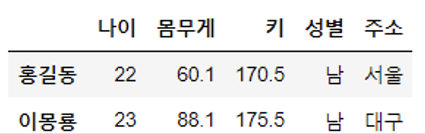

# 데이터값을 카테고리 값으로 변환
- 값의 크기를 기준으로하여 카테고리 값으로 변환하고 싶을때
    - cut(data,bins,labels)
        - 숫자 값의 경계선을 지정하는 경우
            - 예를 들어 나이 (0, 15, 20, 23,..., 100)가 있을 때
                - 경계선 나이를 0, 4,18, 35, 50, 65,100 ... 지정해서
                - 미성년자, 청년, 중년, ... 등의 카테고리로 나눌 경우
        - data : 구간 나눌 실제 값   
        - bins : 구간 경계값  
        - labels: 카테고리값  
    - qcut(data, 구간수, labels=[d1,d2....])
        - 구간 경계선을 지정하지 않고 데이터 수가 동일한 구간으로 분할

#### cut() 

In [15]:
# 구간을 나눌 실제 값 : 관측 데이터
ages =[0, 0.5, 4, 6, 4, 5, 2, 10, 21, 23, 37, 15, 38, 31, 61, 20, 41, 31, 100]

# 카테고리를 나누는 기준 설정 : 구간 경계값
bins = [0, 4, 18, 35, 50, 65, 100]
# 0~4 : 0 < 영유아  <= 4 (0보다 크고 4이하) (0 포함 안 됨)
# 4~18 : 4 <  미성년자  <= 18

# 각 구간의 이름 : labels (카테고리명)
# 주의!! : 순서는 구간(bins)의 순서와 동일해야 함
labels = ['영유아', '미성년자', '청년', '중년', '장년', '노년']

In [22]:
# cut() 함수 : cut(data, bins, labels)
# data=ages 하면 오류 
# ctgs = pd.cut(ages, bins=bins, labels=labels)
ctgs = pd.cut(ages, bins, labels=labels)
ctgs

[NaN, '영유아', '영유아', '미성년자', '영유아', ..., '장년', '청년', '중년', '청년', '노년']
Length: 19
Categories (6, object): ['영유아' < '미성년자' < '청년' < '중년' < '장년' < '노년']

In [23]:
type(ctgs)

pandas.core.arrays.categorical.Categorical

In [24]:
# categories 속성 : 라벨 문자열의 카테고리 값
ctgs.categories

Index(['영유아', '미성년자', '청년', '중년', '장년', '노년'], dtype='object')

In [25]:
# codes 속성 : 정수로 인코딩된 카테고리 값
ctgs.codes
# ages =[0, 0.5, 4, 6, 4, 5, 2, 10, 21, 23, 37, 15, 38, 31, 61, 20, 41, 31, 100]
# NaN은 -1로 표시 : (0은 포함되어 있지 않음 : NaN)
# 코드 값이 -1이면 NaN으로 결정되어 결측치가 됨
# 구간 0 < 영유아 <= 4

array([-1,  0,  0,  1,  0,  1,  0,  1,  2,  2,  3,  1,  3,  2,  4,  2,  3,
        2,  5], dtype=int8)

In [28]:
ctgs_df = pd.DataFrame({
    '나이': ages,
    '연령대': ctgs
})
ctgs_df

# list(ctgs) 사용해도 됨
# ctgs_df = pd.DataFrame({
#     '나이': ages,
#     '연령대': list(ctgs)
# })
# ctgs_df

,나이,연령대
0,0.0,NaN
1,0.5,영유아
2,4.0,영유아
3,6.0,미성년자
4,4.0,영유아
5,5.0,미성년자
6,2.0,영유아
7,10.0,미성년자
8,21.0,청년
9,23.0,청년


In [31]:
# 연령대별 수 확인 (NaN 미 포함)
ctgs_df['연령대'].value_counts()

# 연령대별 수 확인 (NaN 포함)
ctgs_df.value_counts('연령대', dropna=False)
ctgs_df['연령대'].value_counts(dropna=False).sort_index()

연령대
청년      5
영유아     4
미성년자    4
중년      3
장년      1
노년      1
Name: count, dtype: int64

연령대
청년      5
영유아     4
미성년자    4
중년      3
장년      1
노년      1
NaN     1
Name: count, dtype: int64

연령대
영유아     4
미성년자    4
청년      5
중년      3
장년      1
노년      1
NaN     1
Name: count, dtype: int64

In [40]:
# 총 연령대 수 확인
ctgs_df['연령대'].count() # NaN 제외

print("총 연령대 수:", len(ctgs_df))
ctgs_df['연령대'].value_counts().sum() 
ctgs_df.value_counts('연령대', dropna=False).sum()

18

총 연령대 수: 19


18

19

#### qcut()
- qcut(data, 구간수, labels=[d1,d2....])
- 구간 경계선을 지정하지 않고 데이터 수가 동일한 구간으로 분할
- 예 : 1000개의 데이터를 4구간으로 분할하는 경우
    - 한 구간마다 250개씩 데이터 포함
- 예외 : 같은 숫자인 경우에는 같은 구간으로 처리
    - 각 구간의 데이터 수가 다를 수 있음

In [44]:
# 랜덤 정수 20개 생성하고 생성된 정수를 4개 구간으로 분할
# 각 구간의 이름(label)은 Q1, Q2, Q3, Q4로 설정

# 랜덤 정수 생성 : 범위 0 ~19, 20개
# seed : 1로 설정 (재실행해도 변경되지 않도록)
np.random.seed(1)
data = np.random.randint(20, size=20)
data

array([ 5, 11, 12,  8,  9, 11,  5, 15,  0, 16,  1, 12,  7, 13,  6, 18,  5,
       18, 11, 10])

In [45]:
qctg = pd.qcut(data, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
qctg

['Q1', 'Q3', 'Q3', 'Q2', 'Q2', ..., 'Q4', 'Q1', 'Q4', 'Q3', 'Q2']
Length: 20
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

In [46]:
type(qctg)

pandas.core.arrays.categorical.Categorical

In [47]:
# 각 구간 수 확인
qctg.value_counts()

Q1    5
Q2    5
Q3    5
Q4    5
Name: count, dtype: int64

In [52]:
# pd.value_counts(qctg) # deprecated 
pd.Series(qctg).value_counts()

Q1    5
Q2    5
Q3    5
Q4    5
Name: count, dtype: int64

In [53]:
# 데이터프레임으로 생성
qctg_df = pd.DataFrame(data, columns=['관측수'])
qctg_df

,관측수
0,5
1,11
2,12
3,8
4,9
5,11
6,5
7,15
8,0
9,16


In [54]:
# qctg 값을 '범주' 열로 추가
qctg_df['범주'] = qctg
qctg_df

,관측수,범주
0,5,Q1
1,11,Q3
2,12,Q3
3,8,Q2
4,9,Q2
5,11,Q3
6,5,Q1
7,15,Q4
8,0,Q1
9,16,Q4


In [55]:
# qctg_df를 범주 열 기준으로 오름차순 정렬 
qctg_df.sort_values(by='범주')

,관측수,범주
0,5,Q1
16,5,Q1
10,1,Q1
8,0,Q1
6,5,Q1
14,6,Q2
12,7,Q2
19,10,Q2
4,9,Q2
3,8,Q2


In [67]:
# 동일한 값이 존재할 경우 구간의 수가 달라질 수 있음
# seed 설정하지 않고 실행할 때마다 다른 값 생성해서
# 동일한 값이 존재할 경우 구간의 수가 달라지는지 확인
data = np.random.randint(20, size=20)
qctg2 = pd.qcut(data, 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
qctg2

qctg2.value_counts()

['Q3', 'Q3', 'Q4', 'Q2', 'Q1', ..., 'Q2', 'Q1', 'Q3', 'Q2', 'Q3']
Length: 20
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

Q1    5
Q2    5
Q3    7
Q4    3
Name: count, dtype: int64

### 인덱스 설정
경우에 따라 데이터프레임에 인덱스로 들어가 있어야 할 데이터가
일반 데이터 열에 들어가 있거나
반대로 일반 데이터 열이어야 하는데 인덱스로 들어가 있는 경우가 존재  
인덱스와 열을 교환하는 방법이 필요

#### 인덱스 설정 함수

데이터프레임의 인덱스 설정하고 제거하는 함수 
 - set_index()  
        - 기존의 행 인덱스를 제거하고  
        - 데이터 열 중에서 하나를 인덱스로 설정  
        - (열 -> 인덱스)  
 - reset_index()  
        - 기존의 행 인덱스를 제거하고   
        - 인덱스를 열로 추가  
        - (인덱스 -> 열)  

### set_index(열, inplace=True) : 인덱스 설정
- 열 -> 인덱스  

In [68]:
df6 = pd.DataFrame({
    'a':[1,3,4,3,4],
    'b':[2,3,1,4,5],
    'c':[1,5,2,4,4]
})
df6


,a,b,c
0,1,2,1
1,3,3,5
2,4,1,2
3,3,4,4
4,4,5,4


In [69]:
# a 열을 인덱스로 설정
df6.set_index('a') # 원본에 반영되지 않음
df6 

,b,c
a,,
1,2,1
3,3,5
4,1,2
3,4,4
4,5,4


,a,b,c
0,1,2,1
1,3,3,5
2,4,1,2
3,3,4,4
4,4,5,4


In [70]:
# a 열을 인덱스로 설정
df6.set_index('a', inplace=True) # 원본에 반영
df6 

,b,c
a,,
1,2,1
3,3,5
4,1,2
3,4,4
4,5,4


In [71]:
df6.index

Index([1, 3, 4, 3, 4], dtype='int64', name='a')

### reset_index() 시 기존 인덱스 삭제 가능
- drop=True로 설정하면
- 인덱스를 열 인덱스로 올리는 것이 아니라 그냥 버림
- 인덱스값이 관측값이 아니거나 불필요한 경우는 
- df의 열데이터로 추가되지 않게 해야함

In [72]:
# 인덱스를 열로 보내고 
# 기본 인덱스(0-base 위치 인덱스)로 변경
df6.reset_index(inplace=True)
df6

,a,b,c
0,1,2,1
1,3,3,5
2,4,1,2
3,3,4,4
4,4,5,4


#### reset_index() 시 기존 인덱스 삭제 가능
- drop=True로 설정하면
- 행 인덱스를 열 인덱스로 올리는 것이 아니라 그냥 버림
- 불필요한 경우 df의 열로 추가하지 않고 삭제함

In [73]:
# 다시 인덱스 설정
df6.set_index('a', inplace=True)
df6

,b,c
a,,
1,2,1
3,3,5
4,1,2
3,4,4
4,5,4


In [76]:
# reset_index() 하면서 인덱스 삭제
df6.reset_index(drop=True, inplace=True)
df6

,b,c
0,2,1
1,3,5
2,1,2
3,4,4
4,5,4


### index 이름 변경
- 행 인덱스 이름 변경  
    - rename(index={현재 index:새index}) 
- 열 인덱스 이름 변경  
    - rename(columns={현재 index:새index}) 

In [77]:
df6 = pd.DataFrame({
    'a':[1,3,4,3,4],
    'b':[2,3,1,4,5],
    'c':[1,5,2,4,4]
})
df6

,a,b,c
0,1,2,1
1,3,3,5
2,4,1,2
3,3,4,4
4,4,5,4


In [78]:
# 행 인덱스 이름 변경 : index
df6.rename(index={
    0:'1반',
    1:'2반',
    2:'3반',
    3:'4반',
    4:'5반'}, inplace=True)
df6

,a,b,c
1반,1,2,1
2반,3,3,5
3반,4,1,2
4반,3,4,4
5반,4,5,4


In [80]:
# 열 인덱스 이름 변경 : columns
df6.rename(columns={'b': 'B'}, inplace=True)
df6

,a,B,c
1반,1,2,1
2반,3,3,5
3반,4,1,2
4반,3,4,4
5반,4,5,4


In [81]:
# 열 인덱스 순서 변경
df6 = df6[['c', 'a', 'B']]
df6

,c,a,B
1반,1,1,2
2반,5,3,3
3반,2,4,1
4반,4,3,4
5반,4,4,5


### 다중 인덱스 (멀티 인덱스)
- 행 또는 열에 여러 계층의 인덱스 포하ㅏㅁ
- stack : 열 -> 행 인덱스 
- unstack : 행 -> 열 인덱스로 변환

In [84]:
# 다중 인덱스 포함하는 데이터프레임 생성1
# 홍길동 : 영어, 수학
# 이몽룡 : 영어, 수학
np.random.seed(0)
df7 = pd.DataFrame(np.random.randint(0, 101, size=(5,4)),
                  columns=[['홍길동', '홍길동', '이몽룡', '이몽룡'],
                           ['영어', '수학', '영어', '수학']])
df7

홍길동     이몽룡    
   영어  수학  영어  수학
0  44  47  64  67
1  67   9  83  21
2  36  87  70  88
3  88  12  58  65
4  39  87  46  88

In [87]:
# 다중 인덱스 포함하는 데이터프레임 생성2
columns = pd.MultiIndex.from_product([['홍길동', '이몽룡'],
                                       ['영어', '수학']],
                                     names=['성명','과목'])
data = np.random.randint(0, 101, size=(5,4))
df8 = pd.DataFrame(data, columns = columns)
df8

성명 홍길동     이몽룡    
과목  영어  수학  영어  수학
0   81  37  25  77
1   72   9  20  80
2   69  79  47  64
3   82  99  88  49
4   29  19  19  14

In [88]:
df8.stack()

성명    홍길동  이몽룡
  과목          
0 수학   37   77
  영어   81   25
1 수학    9   80
  영어   72   20
2 수학   79   64
  영어   69   47
3 수학   99   49
  영어   82   88
4 수학   19   14
  영어   29   19

In [89]:
df8.stack(0)

과목     영어  수학
  성명         
0 이몽룡  25  77
  홍길동  81  37
1 이몽룡  20  80
  홍길동  72   9
2 이몽룡  47  64
  홍길동  69  79
3 이몽룡  88  49
  홍길동  82  99
4 이몽룡  19  14
  홍길동  29  19

In [90]:
df8.unstack()

성명   과목   
홍길동  영어  0    81
         1    72
         2    69
         3    82
         4    29
     수학  0    37
         1     9
         2    79
         3    99
         4    19
이몽룡  영어  0    25
         1    20
         2    47
         3    88
         4    19
     수학  0    77
         1    80
         2    64
         3    49
         4    14
dtype: int32

In [94]:
# 각 반의 성별에 따른 과목별 평균 점수로 데이터프레임 생성
# 학년 : 1, 2
# 반 : 1반, 2반
# 성별 : 여자, 남자
# 과목 : 국어, 영어, 수학

# 몇 개 데이터 필요? 24개 4행 6열 
# 0~100, 4행 6열 랜덤 숫자 생성
data = np.random.randint(0,101, size=(4,6))
index = pd.MultiIndex.from_product([[1, 2],['1반', '2반']], names=['학년', '반'])
columns = pd.MultiIndex.from_product([['여자', '남자'], ['국어', '영어', '수학']],
                                     names=['성별', '과목'])

df9 = pd.DataFrame(data, index=index, columns=columns)
df9 

성별     여자          남자        
과목     국어  영어  수학  국어  영어  수학
학년 반                         
1  1반  58  31   1  65  41  57
   2반  35  11  46  82  91   0
2  1반  14  99  53  12  42  84
   2반  75  68   6  68  47   3

In [95]:
df9.stack()

성별        여자  남자
학년 반  과목        
1  1반 국어  58  65
      수학   1  57
      영어  31  41
   2반 국어  35  82
      수학  46   0
      영어  11  91
2  1반 국어  14  12
      수학  53  84
      영어  99  42
   2반 국어  75  68
      수학   6   3
      영어  68  47

In [96]:
df9.stack(0)

과목        국어  영어  수학
학년 반  성별            
1  1반 남자  65  41  57
      여자  58  31   1
   2반 남자  82  91   0
      여자  35  11  46
2  1반 남자  12  42  84
      여자  14  99  53
   2반 남자  68  47   3
      여자  75  68   6

In [97]:
df9.stack(1)

성별        여자  남자
학년 반  과목        
1  1반 국어  58  65
      수학   1  57
      영어  31  41
   2반 국어  35  82
      수학  46   0
      영어  11  91
2  1반 국어  14  12
      수학  53  84
      영어  99  42
   2반 국어  75  68
      수학   6   3
      영어  68  47

In [98]:
df9.unstack()

성별  여자                      남자                   
과목  국어      영어      수학      국어      영어      수학   
반   1반  2반  1반  2반  1반  2반  1반  2반  1반  2반  1반 2반
학년                                               
1   58  35  31  11   1  46  65  82  41  91  57  0
2   14  75  99  68  53   6  12  68  42  47  84  3

In [99]:
df9.unstack(0)

성별  여자                      남자                    
과목  국어      영어      수학      국어      영어      수학    
학년   1   2   1   2   1   2   1   2   1   2   1   2
반                                                 
1반  58  14  31  99   1  53  65  12  41  42  57  84
2반  35  75  11  68  46   6  82  68  91  47   0   3

In [100]:
df9.unstack(1)

성별  여자                      남자                   
과목  국어      영어      수학      국어      영어      수학   
반   1반  2반  1반  2반  1반  2반  1반  2반  1반  2반  1반 2반
학년                                               
1   58  35  31  11   1  46  65  82  41  91  57  0
2   14  75  99  68  53   6  12  68  42  47  84  3

#### 리스트 내포 for문의 일반 문법
- [표현식(연산식) for 항목 in 반복가능객체 if 조건문]
- [참일 때 표현식 if 조건 else 거짓일 때 for 항목 in 반복가능한 객체]  
- if 조건문은 생략 가능하다.
- 반복가능객체 : 리스트, 튜플,딕셔너리,range()등


In [109]:
a = [1, 2, 3, 4]
result= []

for num in a:
    result.append(num * 2)

result

[2, 4, 6, 8]

In [110]:
# 리스트 a의 각 원소에 곱하기 2하는 표현식을 
# 리스트 내포 for 문 사용해서 변경 
a = [1, 2, 3, 4]
result = [num * 2 for num in a]
result

[2, 4, 6, 8]

In [114]:
# if 문 포함 경우
# 0~9 범위에서 짝수인 경우 제곱값 반환하는 식을 
# 리스트 내포 for 문 사용해서 구현
result = [b**2 for b in range(10) if b % 2 ==0]
result

[0, 4, 16, 36, 64]

In [116]:
# if ~ else 문 포함
scores = [90, 55, 88, 77, 45]

# 60점 이상이면 합격, 아니면 불합격 결과를 리스트로 생성 
# 리스트 내포 for 문 사용
result = ['합격' if b>=60 else '불합격' for b in scores]
result


[f'{score} : pass' if score >= 60 else f'{score} : fail' for score in scores ]

['합격', '불합격', '합격', '합격', '불합격']

['90 : pass', '55 : fail', '88 : pass', '77 : pass', '45 : fail']

In [137]:
['합격'  for b in scores if b>=60] # 결과 값 3개

['합격' if b>=60 else None for b in scores]
['합격' if b>=60 else np.nan for b in scores]

['합격', '합격', '합격']

['합격', None, '합격', '합격', None]

['합격', nan, '합격', '합격', nan]

In [121]:
# 데이터프레임으로 생성 
# 열 이름 : 점수, 결과
df = pd.DataFrame({"점수": scores, "결과": result})
df

,점수,결과
0,90,합격
1,55,불합격
2,88,합격
3,77,합격
4,45,불합격


### 문자열 데이터 변환
- 시리즈의 str 속성 사용  
- 문자열 일부 추출 : 문자열 슬라이싱  
- 문자열 분리 : split()   

In [123]:
students = pd.DataFrame({
    'name':['홍길동', '이몽룡', '성춘향'],
    'info':['한국대학교 1학년 수학과',
            '대한대학교 3학년 국어과',
            '민국대학교 4학년 체육과']
})
students

,name,info
0,홍길동,한국대학교 1학년 수학과
1,이몽룡,대한대학교 3학년 국어과
2,성춘향,민국대학교 4학년 체육과


In [125]:
# info 열에서 대학명만 출력
students['info'].str[0:4]

0    한국대학
1    대한대학
2    민국대학
Name: info, dtype: object

In [126]:
# info 열 값을 구분자(스페이스)로 분리 
students['info'].str.split(' ')

0    [한국대학교, 1학년, 수학과]
1    [대한대학교, 3학년, 국어과]
2    [민국대학교, 4학년, 체육과]
Name: info, dtype: object

In [128]:
# 데이터프레임의 확장 열로 생성 : expand=True
students['info'].str.split(' ', expand=True)

students2 = students['info'].str.split(' ', expand=True)
students2

,0,1,2
0,한국대학교,1학년,수학과
1,대한대학교,3학년,국어과
2,민국대학교,4학년,체육과


,0,1,2
0,한국대학교,1학년,수학과
1,대한대학교,3학년,국어과
2,민국대학교,4학년,체육과


In [130]:
# 2개의 데이터프레임 연결 : pd.concat() 사용
# 옆으로 연결 (열 연결)
pd.concat([students, students2], axis=1) # 행끼리 연결 (디폴트로 합집합 : 전체 연결)
pd.concat([students, students2], axis=1, join='outer') # 동일 결과

,name,info,0,1,2
0,홍길동,한국대학교 1학년 수학과,한국대학교,1학년,수학과
1,이몽룡,대한대학교 3학년 국어과,대한대학교,3학년,국어과
2,성춘향,민국대학교 4학년 체육과,민국대학교,4학년,체육과


,name,info,0,1,2
0,홍길동,한국대학교 1학년 수학과,한국대학교,1학년,수학과
1,이몽룡,대한대학교 3학년 국어과,대한대학교,3학년,국어과
2,성춘향,민국대학교 4학년 체육과,민국대학교,4학년,체육과


In [131]:
students_df = pd.concat([students, students2], axis=1)
students_df

,name,info,0,1,2
0,홍길동,한국대학교 1학년 수학과,한국대학교,1학년,수학과
1,이몽룡,대한대학교 3학년 국어과,대한대학교,3학년,국어과
2,성춘향,민국대학교 4학년 체육과,민국대학교,4학년,체육과


In [140]:
# (1) info 열 삭제
# students_df.drop('info', axis=1, inplace=True)
del students_df['info'
students_df

,name,0,1,2
0,홍길동,한국대학교,1학년,수학과
1,이몽룡,대한대학교,3학년,국어과
2,성춘향,민국대학교,4학년,체육과


In [142]:
# (2) 열 이름 변경 : 성명, 학교, 학년, 학과
# students_df.rename(columns={'name': '성명', 0:'학교', 1:'학년', 2:'학과'}, inplace=True)
students_df.columns=['성명','학교','학년','학과']
students_df

,성명,학교,학년,학과
0,홍길동,한국대학교,1학년,수학과
1,이몽룡,대한대학교,3학년,국어과
2,성춘향,민국대학교,4학년,체육과


In [143]:
# (3) 열 순서 변경 : 학교, 학과 , 학년, 성명
students_df = students_df[['학교','학과','학년','성명']]
students_df

,학교,학과,학년,성명
0,한국대학교,수학과,1학년,홍길동
1,대한대학교,국어과,3학년,이몽룡
2,민국대학교,체육과,4학년,성춘향
